In [ ]:
#Mark
# Install the required libraries
!pip install prophet

In [1]:
# Import the required libraries and dependencies
import pandas as pd
#Mark
from prophet import Prophet
import datetime as dt
%matplotlib inline

In [2]:
# Read the 5 csv files as DataFrames, with the first date as index
# Name them AAPL, COMP, GOOGL, MSFT and SPX

msft_df = pd.read_csv('Resources/MSFT-5-yrs.csv',
                 index_col="Date",
                 parse_dates=True
                 )

aapl_df = pd.read_csv('Resources/AAPL-5-yrs.csv',
                 index_col="Date",
                 parse_dates=True
                 )

googl_df = pd.read_csv('Resources/GOOGL-5-yrs.csv',
                 index_col="Date",
                 parse_dates=True
                 )

comp_df = pd.read_csv('Resources/COMP-5-yrs.csv',
                 index_col="Date",
                 parse_dates=True
                 )

spx_df = pd.read_csv('Resources/SPX-5-yrs.csv',
                 index_col="Date",
                 parse_dates=True
                 )

In [3]:
# Preview all 5 datasets to ensure that all column names match and that there is no null data
display(msft_df.head(), aapl_df.head(), googl_df.head(), comp_df.head(), spx_df.head())

,Close/Last,Volume,Open,High,Low
Date,,,,,
2024-10-08,$414.71,19229260,$410.90,$415.66,$408.17
2024-10-07,$409.54,20919760,$416.00,$417.11,$409.00
2024-10-04,$416.06,19190910,$418.24,$419.75,$414.97
2024-10-03,$416.54,13686420,$417.63,$419.55,$414.29
2024-10-02,$417.13,16582260,$422.58,$422.82,$416.71


,Close/Last,Volume,Open,High,Low
Date,,,,,
2024-10-08,$225.77,31855690,$224.30,$225.98,$223.25
2024-10-07,$221.69,39505350,$224.50,$225.69,$221.33
2024-10-04,$226.80,37345100,$227.90,$228.00,$224.13
2024-10-03,$225.67,34044160,$225.14,$226.805,$223.32
2024-10-02,$226.78,32880610,$225.89,$227.37,$223.02


,Close/Last,Volume,Open,High,Low
Date,,,,,
2024-10-08,$164.38,23072730,$163.94,$164.725,$162.87
2024-10-07,$162.98,22463140,$167.72,$168.48,$162.75
2024-10-04,$167.06,19093720,$168.06,$168.23,$165.48
2024-10-03,$165.86,15073100,$164.41,$166.64,$163.923
2024-10-02,$165.86,17760180,$166.42,$167.52,$164.73


,Close/Last,Open,High,Low
Date,,,,
2024-10-07,17923.90,18080.11,18096.33,17900.04
2024-10-04,18137.85,18130.42,18145.28,17952.30
2024-10-03,17918.48,17859.49,18011.25,17826.42
2024-10-02,17925.12,17867.12,17978.57,17767.79
2024-10-01,17910.36,18154.94,18162.72,17779.77


,Close/Last,Open,High,Low
Date,,,,
2024-10-07,5695.94,5737.80,5739.34,5686.85
2024-10-04,5751.07,5737.48,5753.21,5702.83
2024-10-03,5699.94,5698.19,5718.78,5677.37
2024-10-02,5709.54,5698.14,5719.63,5674.00
2024-10-01,5708.75,5757.73,5757.73,5681.28


In [4]:
# Cleanup CSV's and and keep only the closing price and volume
msft_df.info()
aapl_df.info()
googl_df.info()
comp_df.info()
spx_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2024-10-08 to 2019-10-08
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Close/Last  1259 non-null   object
 1   Volume      1259 non-null   int64 
 2   Open        1259 non-null   object
 3   High        1259 non-null   object
 4   Low         1259 non-null   object
dtypes: int64(1), object(4)
memory usage: 59.0+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2024-10-08 to 2019-10-08
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Close/Last  1259 non-null   object
 1   Volume      1259 non-null   int64 
 2   Open        1259 non-null   object
 3   High        1259 non-null   object
 4   Low         1259 non-null   object
dtypes: int64(1), object(4)
memory usage: 59.0+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2024-10-08 to 2019-10-0

In [5]:
#Rename Close/Last column to company_close
msft_df = msft_df.rename(columns={'Close/Last': 'msft_close'})
aapl_df = aapl_df.rename(columns={'Close/Last': 'aapl_close'})
googl_df = googl_df.rename(columns={'Close/Last': 'googl_close'})
comp_df = comp_df.rename(columns={'Close/Last': 'comp_close'})
spx_df = spx_df.rename(columns={'Close/Last': 'spx_close'})
#aapl_df.head()
display(msft_df.head(), aapl_df.head(), googl_df.head(), comp_df.head(), spx_df.head())

,msft_close,Volume,Open,High,Low
Date,,,,,
2024-10-08,$414.71,19229260,$410.90,$415.66,$408.17
2024-10-07,$409.54,20919760,$416.00,$417.11,$409.00
2024-10-04,$416.06,19190910,$418.24,$419.75,$414.97
2024-10-03,$416.54,13686420,$417.63,$419.55,$414.29
2024-10-02,$417.13,16582260,$422.58,$422.82,$416.71


,aapl_close,Volume,Open,High,Low
Date,,,,,
2024-10-08,$225.77,31855690,$224.30,$225.98,$223.25
2024-10-07,$221.69,39505350,$224.50,$225.69,$221.33
2024-10-04,$226.80,37345100,$227.90,$228.00,$224.13
2024-10-03,$225.67,34044160,$225.14,$226.805,$223.32
2024-10-02,$226.78,32880610,$225.89,$227.37,$223.02


,googl_close,Volume,Open,High,Low
Date,,,,,
2024-10-08,$164.38,23072730,$163.94,$164.725,$162.87
2024-10-07,$162.98,22463140,$167.72,$168.48,$162.75
2024-10-04,$167.06,19093720,$168.06,$168.23,$165.48
2024-10-03,$165.86,15073100,$164.41,$166.64,$163.923
2024-10-02,$165.86,17760180,$166.42,$167.52,$164.73


,comp_close,Open,High,Low
Date,,,,
2024-10-07,17923.90,18080.11,18096.33,17900.04
2024-10-04,18137.85,18130.42,18145.28,17952.30
2024-10-03,17918.48,17859.49,18011.25,17826.42
2024-10-02,17925.12,17867.12,17978.57,17767.79
2024-10-01,17910.36,18154.94,18162.72,17779.77


,spx_close,Open,High,Low
Date,,,,
2024-10-07,5695.94,5737.80,5739.34,5686.85
2024-10-04,5751.07,5737.48,5753.21,5702.83
2024-10-03,5699.94,5698.19,5718.78,5677.37
2024-10-02,5709.54,5698.14,5719.63,5674.00
2024-10-01,5708.75,5757.73,5757.73,5681.28


In [6]:
# Merge the Dataframes into one - call it MERGED
merged_df = pd.concat([msft_df['msft_close'], aapl_df['aapl_close'], googl_df['googl_close'], comp_df['comp_close'], spx_df['spx_close']], axis=1).dropna()

In [7]:
#Preview the merged df; look at info
display(merged_df.head(), merged_df.tail(), merged_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-10-08 to 2024-10-07
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   msft_close   1258 non-null   object 
 1   aapl_close   1258 non-null   object 
 2   googl_close  1258 non-null   object 
 3   comp_close   1258 non-null   float64
 4   spx_close    1258 non-null   float64
dtypes: float64(2), object(3)
memory usage: 59.0+ KB


,msft_close,aapl_close,googl_close,comp_close,spx_close
Date,,,,,
2019-10-08,$135.67,$56.10,$59.5065,7823.78,2893.06
2019-10-09,$138.24,$56.7575,$60.12,7903.74,2919.40
2019-10-10,$139.10,$57.5225,$60.4735,7950.78,2938.13
2019-10-11,$139.68,$59.0525,$60.7855,8057.04,2970.27
2019-10-14,$139.55,$58.9675,$60.8885,8048.65,2966.15


,msft_close,aapl_close,googl_close,comp_close,spx_close
Date,,,,,
2024-10-01,$420.69,$226.21,$166.99,17910.36,5708.75
2024-10-02,$417.13,$226.78,$165.86,17925.12,5709.54
2024-10-03,$416.54,$225.67,$165.86,17918.48,5699.94
2024-10-04,$416.06,$226.80,$167.06,18137.85,5751.07
2024-10-07,$409.54,$221.69,$162.98,17923.90,5695.94


None

In [8]:
#Remove dollar signs
merged_df['msft_close'] = merged_df['msft_close'].str.replace('$', '', regex=False)
merged_df['aapl_close'] = merged_df['aapl_close'].str.replace('$', '', regex=False)
merged_df['googl_close'] = merged_df['googl_close'].str.replace('$', '', regex=False)

#Verify conversion to float
merged_df.head()

,msft_close,aapl_close,googl_close,comp_close,spx_close
Date,,,,,
2019-10-08,135.67,56.10,59.5065,7823.78,2893.06
2019-10-09,138.24,56.7575,60.12,7903.74,2919.40
2019-10-10,139.10,57.5225,60.4735,7950.78,2938.13
2019-10-11,139.68,59.0525,60.7855,8057.04,2970.27
2019-10-14,139.55,58.9675,60.8885,8048.65,2966.15


In [9]:
#Make close columns dtype float64 and round to 2 decimal places
merged_df[['msft_close', 'aapl_close', 'googl_close']] = merged_df[['msft_close', 'aapl_close', 'googl_close']].astype(float).round(2)
merged_df.head()

,msft_close,aapl_close,googl_close,comp_close,spx_close
Date,,,,,
2019-10-08,135.67,56.10,59.51,7823.78,2893.06
2019-10-09,138.24,56.76,60.12,7903.74,2919.40
2019-10-10,139.10,57.52,60.47,7950.78,2938.13
2019-10-11,139.68,59.05,60.79,8057.04,2970.27
2019-10-14,139.55,58.97,60.89,8048.65,2966.15


In [10]:
# Pete - Plot correlation of stocks; drill into 2024 performance (see pg 8 of powerpoint)
# Step 1 - Filter out 2024
df_2024 = merged_df[merged_df.index.year == 2024]
display(df_2024.head())
display(df_2024.tail())
merged_df.info()

,msft_close,aapl_close,googl_close,comp_close,spx_close
Date,,,,,
2024-01-02,370.87,185.64,138.17,14765.94,4742.83
2024-01-03,370.60,184.25,138.92,14592.21,4704.81
2024-01-04,367.94,181.91,136.39,14510.30,4688.68
2024-01-05,367.75,181.18,135.73,14524.07,4697.24
2024-01-08,374.69,185.56,138.84,14843.77,4763.54


,msft_close,aapl_close,googl_close,comp_close,spx_close
Date,,,,,
2024-10-01,420.69,226.21,166.99,17910.36,5708.75
2024-10-02,417.13,226.78,165.86,17925.12,5709.54
2024-10-03,416.54,225.67,165.86,17918.48,5699.94
2024-10-04,416.06,226.80,167.06,18137.85,5751.07
2024-10-07,409.54,221.69,162.98,17923.90,5695.94


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-10-08 to 2024-10-07
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   msft_close   1258 non-null   float64
 1   aapl_close   1258 non-null   float64
 2   googl_close  1258 non-null   float64
 3   comp_close   1258 non-null   float64
 4   spx_close    1258 non-null   float64
dtypes: float64(5)
memory usage: 59.0 KB


<Axes: title={'center': '2024 Stock and Index Performance'}, xlabel='Date'>

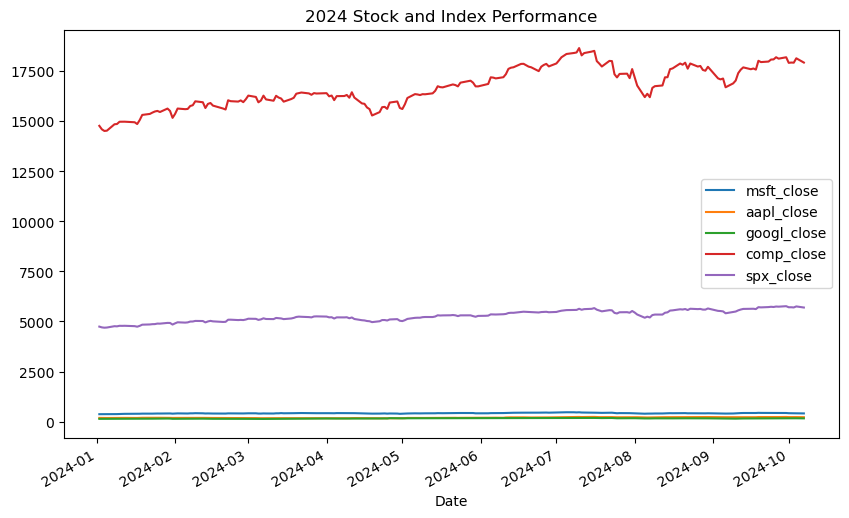

In [11]:
# Pete
# Step 2 - Let's plot it

df_2024[['msft_close', 'aapl_close', 'googl_close', 'comp_close', 'spx_close']].plot(figsize=(10,6), title='2024 Stock and Index Performance')


,msft_close,aapl_close,googl_close,comp_close,spx_close
Date,,,,,
2024-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2024-01-03,0.999272,0.992512,1.005428,0.988234,0.991984
2024-01-04,0.992100,0.979907,0.987117,0.982687,0.988583
2024-01-05,0.991587,0.975975,0.982341,0.983620,0.990388
2024-01-08,1.010300,0.999569,1.004849,1.005271,1.004367
...,...,...,...,...,...
2024-10-01,1.134333,1.218541,1.208584,1.212951,1.203659
2024-10-02,1.124734,1.221612,1.200405,1.213950,1.203826
2024-10-03,1.123143,1.215632,1.200405,1.213501,1.201801


<Axes: title={'center': '2024 Normalized Stock and Index Performance'}, xlabel='Date'>

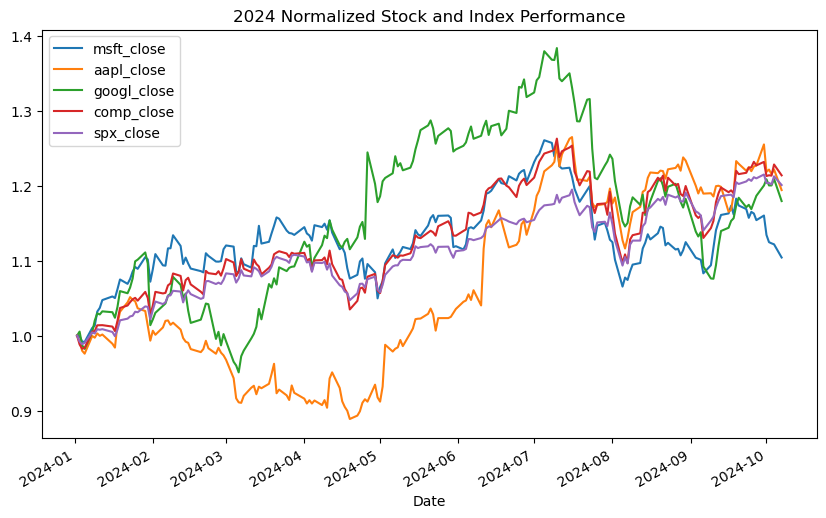

In [12]:
# Pete - Let's normalize the data
#3 Let's normalize the data to the beginning of the year by dividing the first value in each column

df_2024_normalized = df_2024[['msft_close', 'aapl_close', 'googl_close', 'comp_close', 'spx_close']].apply(lambda x: x / x.iloc[0])
display(df_2024_normalized)

# Plot the data
df_2024_normalized.plot(figsize=(10,6), title='2024 Normalized Stock and Index Performance')


,msft_close,aapl_close,googl_close
Date,,,
2024-01-02,NaN,NaN,NaN
2024-01-03,-0.000728,-0.007488,0.005428
2024-01-04,-0.007178,-0.012700,-0.018212
2024-01-05,-0.000516,-0.004013,-0.004839
2024-01-08,0.018872,0.024175,0.022913
...,...,...,...
2024-10-01,-0.022333,-0.029142,0.006874
2024-10-02,-0.008462,0.002520,-0.006767
2024-10-03,-0.001414,-0.004895,0.000000


<Axes: title={'center': 'Daily Percentage Returns of MSFT, AAPL, and GOOGL in 2024'}, xlabel='Date'>

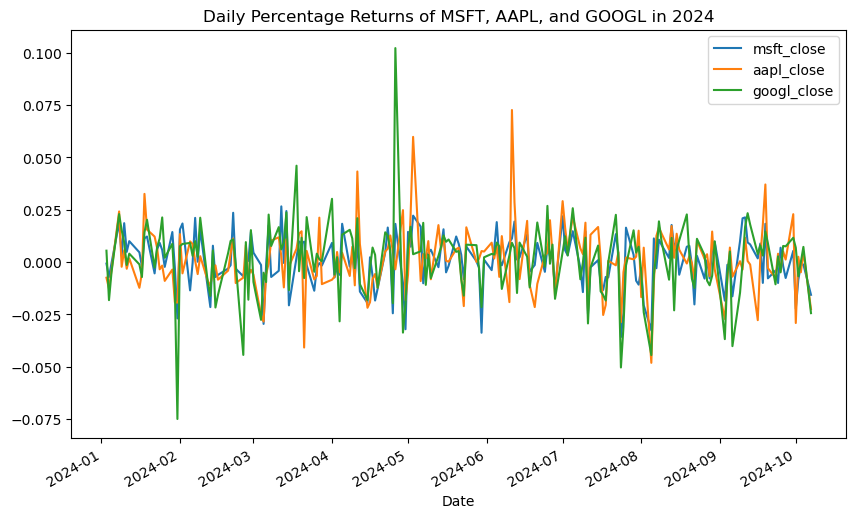

In [13]:
# Pete - Let's analyze the data
#4 - Calculate daily percentage returns for the stocks and plot it
df_2024_returns = df_2024[['msft_close', 'aapl_close', 'googl_close']].pct_change()
display(df_2024_returns)
df_2024_returns.plot(figsize=(10, 6), title='Daily Percentage Returns of MSFT, AAPL, and GOOGL in 2024')

"\nThe .cumprod() function in pandas calculates \nthe cumulative product of a series. \nIt's often used in finance to calculate cumulative \nreturns by multiplying daily returns over time.\n\nFor example, if a stock grows 5% on Day 1 and 2% \non Day 2, .cumprod() multiplies these growth \nfactors (1.05 * 1.02) to show cumulative growth. \nIt tracks how much an investment increases or \ndecreases over time, assuming all returns \nare reinvested.\n\nIn short, .cumprod() is useful for analyzing \ncumulative growth, especially for investment returns.\n"

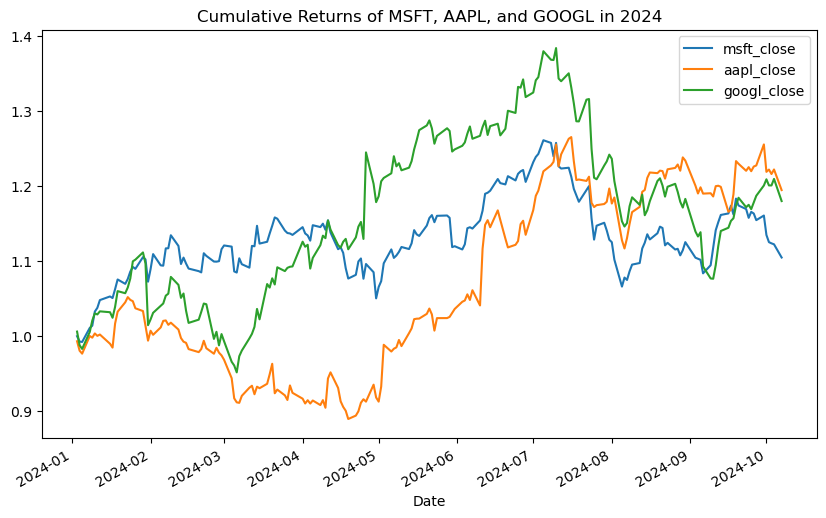

In [14]:
# Pete - Analyze the data
#5 - Calculate cumulative returns to see overall performance growth

df_2024_cumulative = (1 + df_2024_returns).cumprod()

df_2024_cumulative.plot(figsize=(10,6), title='Cumulative Returns of MSFT, AAPL, and GOOGL in 2024')
df_2024_cumulative = (1 + df_2024_returns).cumprod()

"""
The .cumprod() function in pandas calculates 
the cumulative product of a series. 
It's often used in finance to calculate cumulative 
returns by multiplying daily returns over time.

For example, if a stock grows 5% on Day 1 and 2% 
on Day 2, .cumprod() multiplies these growth 
factors (1.05 * 1.02) to show cumulative growth. 
It tracks how much an investment increases or 
decreases over time, assuming all returns 
are reinvested.

In short, .cumprod() is useful for analyzing 
cumulative growth, especially for investment returns.
"""


In [15]:
# Pete - Calculate correlation between the three stocks
#6 Correlation index

correlation_matrix = df_2024_returns.corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
             msft_close  aapl_close  googl_close
msft_close     1.000000    0.461353     0.611729
aapl_close     0.461353    1.000000     0.390037
googl_close    0.611729    0.390037     1.000000


In [ ]:
#Pete
# 7 Summary
'''
**Summary:  The correlation matrix shows how the daily returns of Microsoft, Apple, and Google relate to each other in 2024:**

- **Microsoft and Apple (0.46)**: There’s a moderate positive relationship, meaning they sometimes move in the same direction but not strongly aligned.
- **Microsoft and Google (0.61)**: A stronger positive relationship, indicating that their returns tend to move together more often.
- **Apple and Google (0.39)**: A weak positive relationship, showing that their returns are relatively independent.

### Summary:
- **Microsoft and Google** are the most aligned.
- **Apple** is more independent, with weaker correlations to both Microsoft and Google.
'''

In [ ]:
#Ethan - Forecast/Predict stock trends of Apple (see pg 9 of powerpoint)


In [ ]:
#Mark - Forecast/Predict stock trends of Microsoft (see pg 9 of powerpoint)
#Mark - Forecast/Predict stock trends of Microsoft (see pg 9 of powerpoint)
# !!!!!!!!!!!!!!!!!!!!!!!!!!
### reset the index
prophet_msft_df = msft_df.reset_index()

#drop extra columns by index in-place
#data.drop(['one', 'two'], axis=1)
prophet_msft_df.drop(['Volume', 'Open', 'High', 'Low'], axis=1, inplace=True)
prophet_msft_df.head()

# Label the columns ds and y so that the syntax is recognized by Prophet
prophet_msft_df.columns = ["ds", "y"]
prophet_msft_df.head()

### Drop an NaN values from the prophet_msft_df DataFrame
prophet_msft_df = prophet_msft_df.dropna()

# View the first and last five rows of the msft_prophet_df DataFrame
display(prophet_msft_df.head())
display(prophet_msft_df.tail())

In [ ]:
#Mark - MSFT
# Call the Prophet function, store as an object
m = Prophet()
m

In [ ]:
#Mark
#Cleanup the prophet_msft_df data
#For y remove $ and convert to numeric
#df['Sales'] = df['Sales'].str.replace(',','').str.replace('$','').astype('float')
prophet_msft_df['y'] = prophet_msft_df['y'].str.replace('$','').astype('float')

In [ ]:
#Mark - MSFT
# Fit the time-series model
m.fit(prophet_msft_df)

In [ ]:
#Mark - MSFT
# Create a future dataframe to hold predictions
# How far?????????????????????????????
#
#future_msft_trends = m.make_future_dataframe(periods=90, freq='day')
future_msft_trends = m.make_future_dataframe(periods=90, freq ='D')

#future_msft_trends.tail()
display(future_msft_trends.head())
display(future_msft_trends.tail())

In [ ]:
#Mark - MSFT
# Make the predictions for the trend data
forecast_msft_trends = m.predict(future_msft_trends)

# Display the first five rows of the forecast_msft_trends DataFrame
forecast_msft_trends.head()

In [ ]:
#Mark - MSFT
# Plot the Prophet predictions for the MSFT trends data
m.plot(forecast_msft_trends)

In [ ]:
#Mark - MSFT
# Set the index in the forecast_msft_trends DataFrame to the ds datetime column
forecast_msft_trends = forecast_msft_trends.set_index('ds')


# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
forecast_msft_trends[['yhat', 'yhat_lower', 'yhat_upper']].head()

In [ ]:
#Mark - MSFT
# Reset the index in the forecast_msft_trends DataFrame
forecast_msft_trends = forecast_msft_trends.reset_index()

# Use the plot_components function to visualize the forecast results
# for the forecast_msft_trends DataFrame
m.plot_components(forecast_msft_trends)


In [ ]:
#Marianne - Forecast/Predict stock trends of Google (see pg 9 of powerpoint)


In [ ]:
#Backburner; Pete - Plot components of highest performing forecast (pg 10 of powerpoint)


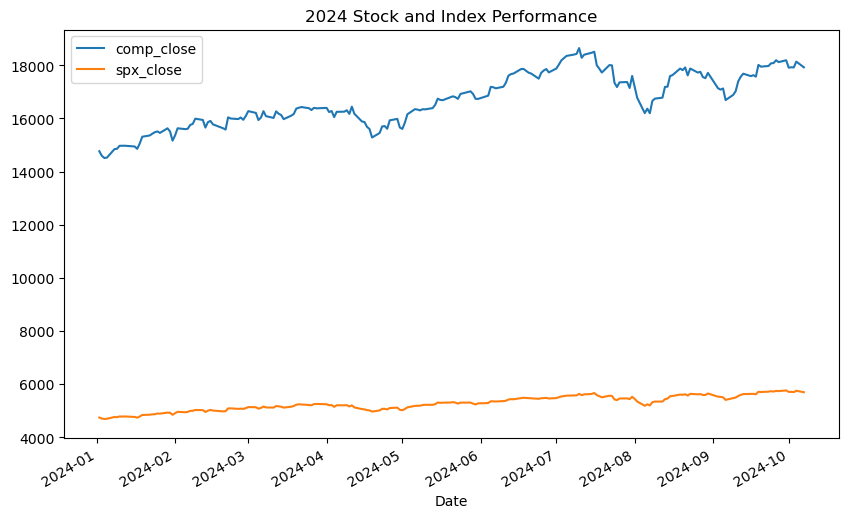

In [17]:
#Steve - Compare these tech stocks to the Nasdaq & S&P 500 indices (pg 11 of powerpoint)

# Steve Step 1 - Plot only the two indices:

df_2024_indices = df_2024[['comp_close', 'spx_close']].plot(figsize=(10,6), title='2024 Stock and Index Performance')


<Axes: title={'center': '2024 Normalized Stock and Index Performance'}, xlabel='Date'>

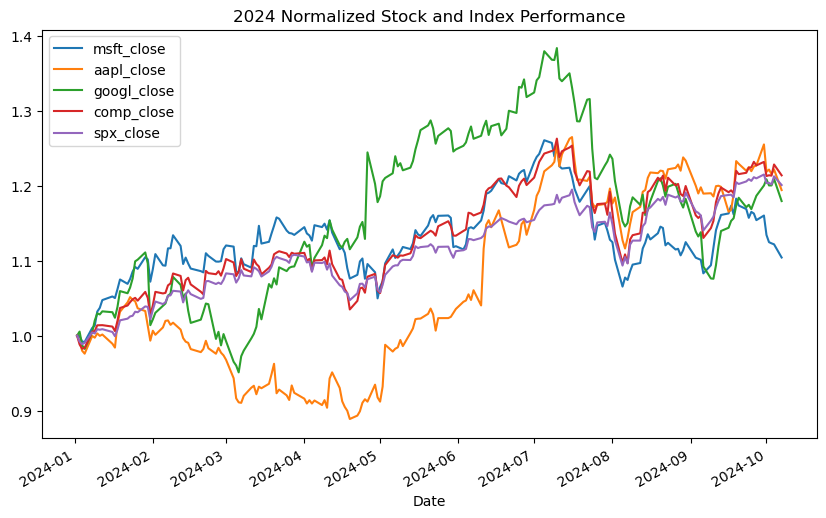

In [18]:
#Steve Step 2 - Plot indices w/ stocks (Pete did this already):

df_2024_normalized.plot(figsize=(10,6), title='2024 Normalized Stock and Index Performance')


<Axes: title={'center': 'Daily Percentage Returns of MSFT, AAPL, GOOGL, NASDAQ & SP500 indices in 2024'}, xlabel='Date'>

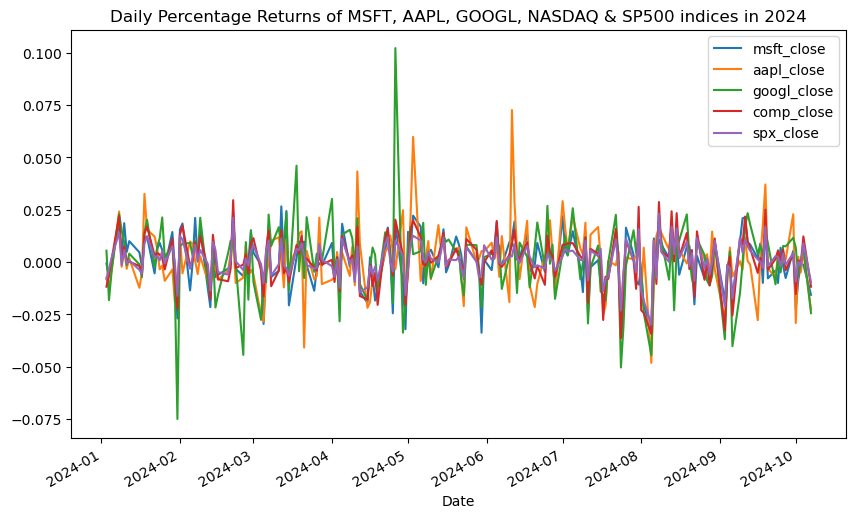

In [19]:
# Steve Step 3 - Calculate daily percentage returns for the stocks and plot it

df_2024_returns_w_indices = df_2024[['msft_close', 'aapl_close', 'googl_close', 'comp_close', 'spx_close']].pct_change()
df_2024_returns_w_indices.plot(figsize=(10, 6), title='Daily Percentage Returns of MSFT, AAPL, GOOGL, NASDAQ & SP500 indices in 2024')


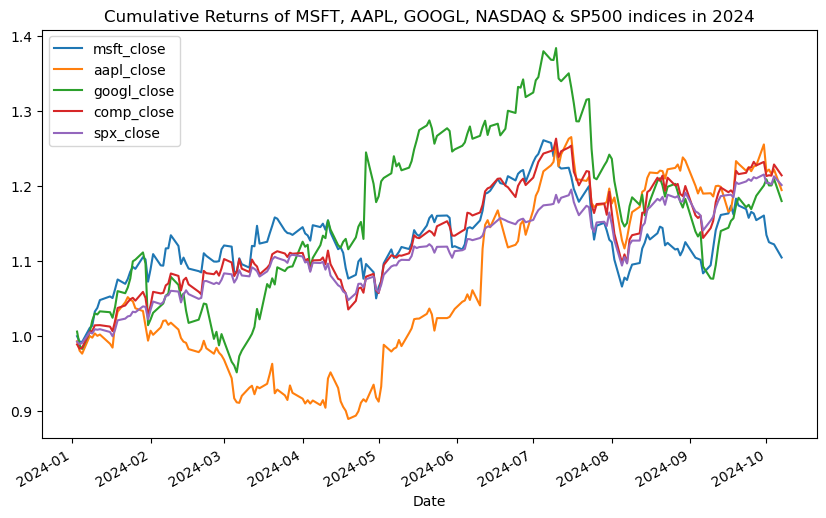

In [20]:
# Steve Step 4 - Calculate cumulative returns to see overall performance growth

df_2024_cumulative_w_indices = (1 + df_2024_returns_w_indices).cumprod()
df_2024_cumulative_w_indices.plot(figsize=(10,6), title='Cumulative Returns of MSFT, AAPL, GOOGL, NASDAQ & SP500 indices in 2024')
df_2024_cumulative_w_indicds = (1 + df_2024_returns_w_indices).cumprod()


In [ ]:
'''**#Steve Step 5 - Summary:**

The three comparison graphs, below, (Normalized, Daily Percentage Returns & Cumulative Returns) all
follow similar patterns - the NASDAQ, SP500 indices & Microsoft have a positive correlation while
Apple & Google also have positive correlations but these two stocks have increased volatility.  That
is, Apple & Google stocks have greater daily ups & down, increases & decreases in daily 2024 price and
daily precentage increase or percentage loss.
'''